
# K-Nearest Neighbors (KNN) Classification  
## Decision Boundary Visualization using Iris Dataset

### Objective
In this assignment, you will:
- Load and explore a real dataset (Iris)
- Implement KNN using scikit-learn
- Observe predictions for different values of **k**
- Visualize decision boundaries
- Analyze the effect of distance metrics

**Important Instructions**
- Do NOT use GridSearchCV or RandomizedSearchCV
- Change values of `k` manually
- Use only two features and two classes



## Task 1: Load and Explore the Dataset
We will use the Iris dataset from `sklearn`.  
Only:
- Features: Sepal Length, Sepal Width  
- Classes: Setosa (0) and Versicolor (1)


In [106]:

from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()

X = iris.data[:, :2]   # sepal length, sepal width
y = iris.target

# Keep only class 0 and 1
mask = y < 2
X = X[mask]
y = y[mask]

print("Shape of X:", X.shape)
print("Class distribution:", np.bincount(y))

df = pd.DataFrame(X, columns=["Sepal Length", "Sepal Width"])
df["Class"] = y
df.head()


Shape of X: (100, 2)
Class distribution: [50 50]


,Sepal Length,Sepal Width,Class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0



## Task 2: Visualize the Dataset


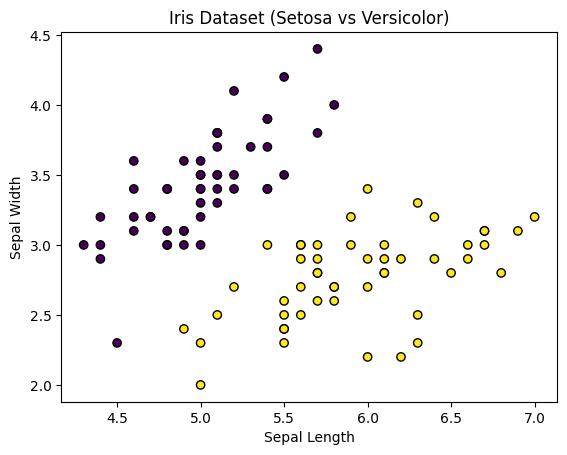

In [107]:

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris Dataset (Setosa vs Versicolor)")
plt.show()


## Task 3: Train a Basic KNN Model (k = 3)


1) split the data into Train data and Test data
2) Fit a KNeighborsClassifier
3) Make the prediction
4) Check for the accuracy

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80, 2), (20, 2), (80,), (20,))

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
knn=KNeighborsClassifier(n_neighbors=3)
knn

KNeighborsClassifier(n_neighbors=3)

In [112]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [113]:
pred=knn.predict(X_test)
pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [114]:
from sklearn.metrics import accuracy_score

In [115]:
accuracy=accuracy_score(y_test,pred)
accuracy

1.0


## Task 4: Predictions for Different Values of k


In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [117]:
k_values=[1,3,5,7,9]

In [118]:
k_values

[1, 3, 5, 7, 9]

In [119]:
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
knn

KNeighborsClassifier(n_neighbors=9)

In [120]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [121]:
y_pred=knn.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [122]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

1.0


## Task 5: Decision Boundary Function (Provided)


In [35]:
import numpy as np
import matplotlib.pyplot as plt
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title(title)
    plt.show()


In [36]:
from sklearn.datasets import load_iris

In [37]:
iris = load_iris()
X = iris.data[:, :2]   
y = iris.target

In [38]:
mask=y<2
X=X[mask]
y=y[mask]

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80, 2), (20, 2), (80,), (20,))

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
k_values=[1,3,5,7]
k_values

[1, 3, 5, 7]

In [43]:
knn=KNeighborsClassifier(n_neighbors=7)
knn

KNeighborsClassifier(n_neighbors=7)

In [44]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

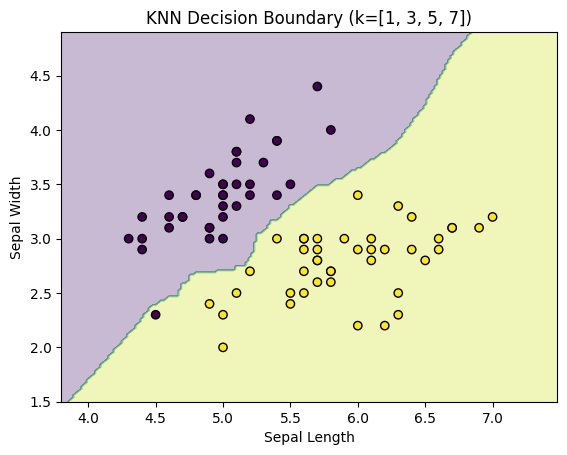

In [49]:
plot_decision_boundary(
        knn,
        X_train,
        y_train,
        title=f"KNN Decision Boundary (k={k_values})"
    )


## Task 6: Decision Boundary for Different Values of k


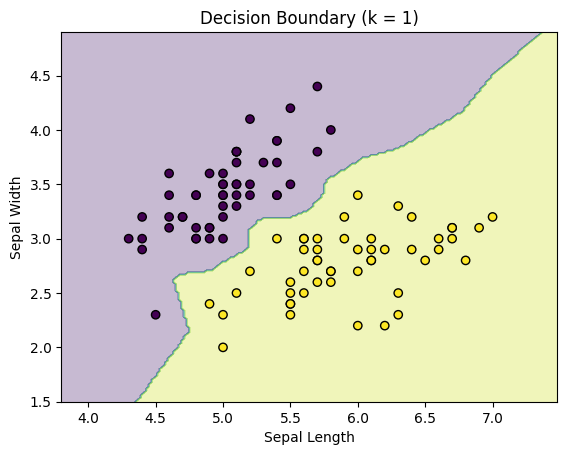

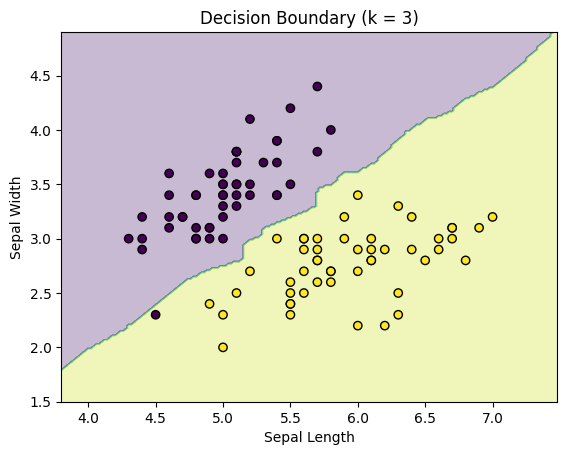

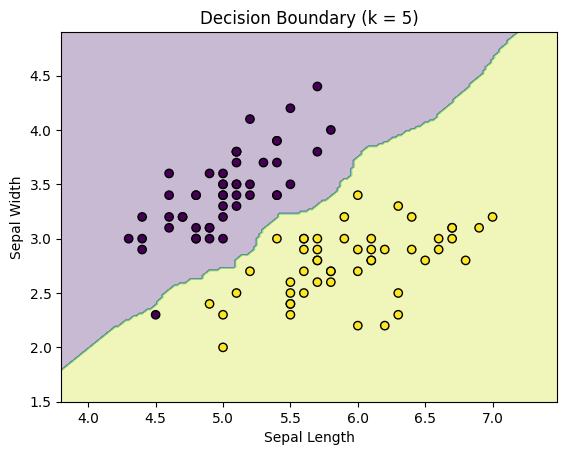

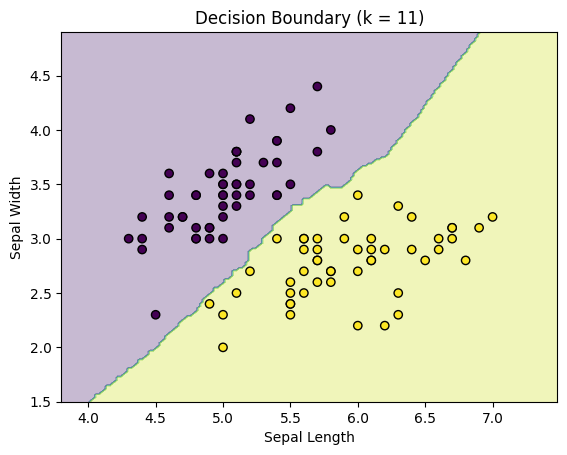

In [50]:

for k in [1, 3, 5, 11]:
    model = KNeighborsClassifier(n_neighbors=k, p=2)
    model.fit(X, y)
    plot_decision_boundary(model, X, y, title=f"Decision Boundary (k = {k})")



## Task 7: Effect of Distance Metric
Fix k = 5 and compare Euclidean vs Manhattan distance


In [52]:
k=5

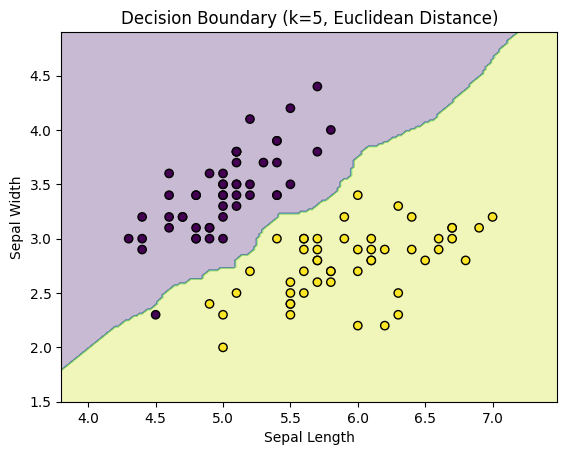

In [53]:
knn_euclidean = KNeighborsClassifier(n_neighbors=k, p=2)
knn_euclidean.fit(X, y)
plot_decision_boundary(
    knn_euclidean, X, y,
    title="Decision Boundary (k=5, Euclidean Distance)"
)

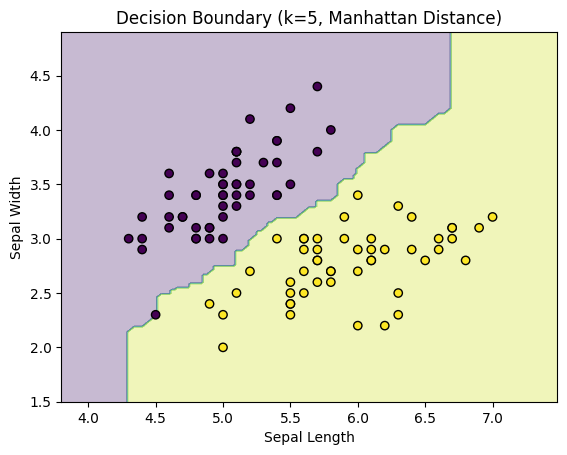

In [54]:
knn_manhattan = KNeighborsClassifier(n_neighbors=k, p=1)
knn_manhattan.fit(X, y)
plot_decision_boundary(
    knn_manhattan, X, y,
    title="Decision Boundary (k=5, Manhattan Distance)"
)


## Task 8: Observations (Answer in Markdown)
1. How do predictions change as k increases?
2. Which k value gives the most complex decision boundary?
3. Why does k = 1 behave differently?
4. How does distance metric affect results?
5. Which configuration would you choose and why?


## Task 8: Observations

1. **How do predictions change as k increases?**  
   As k increases, the model becomes smoother and less sensitive to noise. Small fluctuations in the data have less impact, and the decision boundary becomes less jagged. Large k values can lead to underfitting.

2. **Which k value gives the most complex decision boundary?**  
   k = 1 gives the most complex decision boundary because the model exactly follows the training data points, leading to highly jagged and detailed boundaries.

3. **Why does k = 1 behave differently?**  
   With k = 1, the prediction for each point depends on the closest training sample only. This makes the model extremely sensitive to noise and outliers, creating a very irregular boundary.

4. **How does distance metric affect results?**  
   The choice of distance metric (Euclidean, Manhattan, Minkowski) changes how “closeness” is measured. Some metrics produce smoother boundaries, others may exaggerate differences along certain dimensions.  

5. **Which configuration would you choose and why?**  
   A moderate k value (like 3 or 5) with Euclidean distance is often a good choice. It balances complexity and generalization, avoiding overfitting while capturing the data pattern reasonably well.Key points:





